In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
#Loading data
folder = r'C:\Users\DELL\Desktop\MAS\AR Piller\Aqua_Weekly\Algo'
files = os.listdir(folder)
i=15
for file in files:
    if file.endswith('.xlsx'):

        Name = 'W'
        Combine = Name+''+str(i)+'.xlsx'

        print(Combine)
        rfm_df = pd.read_excel(Combine)
        print(rfm_df)
        
        rfm_df['R_rank'] = rfm_df['R'].rank(ascending=True)
        rfm_df['F_rank'] = rfm_df['F'].rank(ascending=True)
        rfm_df['M_rank'] = rfm_df['M'].rank(ascending=True)
        rfm_df['N_rank'] = rfm_df['N'].rank(ascending=True)
        
         # normalizing the rank of the customers
        rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
        rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
        rfm_df['M_rank_norm'] = (rfm_df['M_rank']/rfm_df['M_rank'].max())*100
        rfm_df['N_rank_norm'] = (rfm_df['N_rank']/rfm_df['N_rank'].max())*100

        rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank','N_rank'], inplace=True)

        #print('Normalized --------------------------------------------------------------------------------: ',rfm_df)
        
        rfm_df['RFM_Score'] = 0.25*rfm_df['R_rank_norm']+0.25 *rfm_df['F_rank_norm']+0.25*rfm_df['M_rank_norm']+0.25*rfm_df['R_rank_norm']
        rfm_df['RFM_Score'] *= 0.05
        #rfm_df = rfm_df.round(2)
        output = rfm_df
        #print(rfm_df[['Customer', 'RFM_Score']])
        
        rfm_df["Customer_segment"] =np.where(rfm_df['RFM_Score'] >3.5, "High Overdue - RFM>3.5",
                                    (np.where(rfm_df['RFM_Score'] > 2,"Moderate Overdue - 2<RFM<3.5",
                                    np.where(rfm_df['RFM_Score'] > 1,'Less Overdue - 1<RFM<2', 'VeryLess Overdue - RFM<1'))))
        
        rfm_df["Customer_segment1"] =np.where(rfm_df['RFM_Score'] >3.5, "4",
                                    (np.where(rfm_df['RFM_Score'] > 2,"3",
                                    np.where(rfm_df['RFM_Score'] > 1,'2', '1'))))
        
        print(rfm_df[['Customer', 'RFM_Score', 'Customer_segment','Customer_segment1']])
        output = rfm_df
        
        submission = pd.DataFrame({
        "Customer": output["Customer"],
        "RFM_Score": output["RFM_Score"],
        "Customer_segment": output["Customer_segment"],
        "Week":'W' + str(i),
        "Cluster": output['Customer_segment1']
        })

        Output = './Output/Output'
        OutCombine = Output+''+str(i)+'.xlsx'
    
        #print(OutCombine)

        submission.to_excel(OutCombine, index=False)
        submission1 = pd.read_excel(OutCombine)
        print(submission1.head(5))
        
        #data = rfm_df[['Customer', 'RFM_Score', 'Customer_segment']]
        #data.to_excel('Output.xlsx', sheet_name='sheet1', index=False)
    i=1+i

W16.xlsx
                               Customer          R  F           M  N
0       Abercrombie & Fitch Trading Co.   4.903806  4   209184.39  2
1                                 Aerie   6.431030  2  2364214.49  1
2      AMAZON ESSENTIAL / SPOTTED ZEBRA  10.000000  1    11178.00  1
3                             Amazon UK   7.527440  2    20443.88  1
4        AMERICAN DESIGNER FASHION, S.A   7.500000  1    14750.15  4
5      Ascena Global Sourcing Hong Kong   8.650027  3   462706.48  1
6   ASCO GENERAL SUPPLIES (FAR EAST)LTD   6.019470  2  1503457.40  1
7                               Athleta   5.413373  2  1805256.39  1
8               BASECO, S.A.P.I DE C.V.        NaN  0        0.00  4
9                Calvin Klein Europe BV   6.369436  3   174505.05  4
10                     Calvin Klein USA   7.500000  1    10438.73  4
11                             Deep End  10.000000  1      463.52  1
12         DKN Asset Management PVT LTD        NaN  0        0.00  1
13            GLORY SWIM 

                           Customer  RFM_Score              Customer_segment  \
0   Abercrombie & Fitch Trading Co.   2.945384  Moderate Overdue - 2<RFM<3.5   
1                             Aerie   2.872328  Moderate Overdue - 2<RFM<3.5   
2  AMAZON ESSENTIAL / SPOTTED ZEBRA   3.333183  Moderate Overdue - 2<RFM<3.5   
3                         Amazon UK   2.650691  Moderate Overdue - 2<RFM<3.5   
4    AMERICAN DESIGNER FASHION, S.A   3.040979  Moderate Overdue - 2<RFM<3.5   

  Week  Cluster  
0  W20        3  
1  W20        3  
2  W20        3  
3  W20        3  
4  W20        3  
W22.xlsx
                               Customer          R  F           M  N
0       Abercrombie & Fitch Trading Co.   7.651469  3   260449.37  4
1                                 Aerie   5.941523  3  3397711.22  1
2      AMAZON ESSENTIAL / SPOTTED ZEBRA  10.000000  1    11178.00  1
3                             Amazon UK   7.500000  1    17528.83  1
4        AMERICAN DESIGNER FASHION, S.A   8.060012  3    

                           Customer  RFM_Score              Customer_segment  \
0   Abercrombie & Fitch Trading Co.   3.304825  Moderate Overdue - 2<RFM<3.5   
1                             Aerie   2.945416  Moderate Overdue - 2<RFM<3.5   
2  AMAZON ESSENTIAL / SPOTTED ZEBRA   3.221431  Moderate Overdue - 2<RFM<3.5   
3                         Amazon UK   2.609108  Moderate Overdue - 2<RFM<3.5   
4    AMERICAN DESIGNER FASHION, S.A   2.805065  Moderate Overdue - 2<RFM<3.5   

  Week  Cluster  
0  W24        3  
1  W24        3  
2  W24        3  
3  W24        3  
4  W24        3  
W26.xlsx
                               Customer          R  F           M  N
0       Abercrombie & Fitch Trading Co.   9.895903  2    61835.95  4
1                                 Aerie   5.559318  3  1814757.07  1
2      AMAZON ESSENTIAL / SPOTTED ZEBRA  10.000000  1    36108.83  1
3                             Amazon UK   7.660314  2   247713.04  1
4        AMERICAN DESIGNER FASHION, S.A   8.674118  3    

                           Customer  RFM_Score              Customer_segment  \
0   Abercrombie & Fitch Trading Co.   3.393142  Moderate Overdue - 2<RFM<3.5   
1                             Aerie   2.496770  Moderate Overdue - 2<RFM<3.5   
2  AMAZON ESSENTIAL / SPOTTED ZEBRA   3.311842  Moderate Overdue - 2<RFM<3.5   
3                         Amazon UK   2.490789  Moderate Overdue - 2<RFM<3.5   
4    AMERICAN DESIGNER FASHION, S.A   2.725678  Moderate Overdue - 2<RFM<3.5   

  Week  Cluster  
0  W28        3  
1  W28        3  
2  W28        3  
3  W28        3  
4  W28        3  
W29.xlsx
                               Customer          R  F           M  N
0       Abercrombie & Fitch Trading Co.   6.963503  3   226683.79  4
1                                 Aerie   6.019902  2   904769.36  1
2      AMAZON ESSENTIAL / SPOTTED ZEBRA  10.000000  1    11178.00  1
3                             Amazon UK   7.510933  2    41705.29  1
4        AMERICAN DESIGNER FASHION, S.A   8.255461  3    

                           Customer  RFM_Score              Customer_segment  \
0   Abercrombie & Fitch Trading Co.   2.756100  Moderate Overdue - 2<RFM<3.5   
1                             Aerie   2.109530  Moderate Overdue - 2<RFM<3.5   
2  AMAZON ESSENTIAL / SPOTTED ZEBRA   3.410965  Moderate Overdue - 2<RFM<3.5   
3                         Amazon UK   2.565909  Moderate Overdue - 2<RFM<3.5   
4    AMERICAN DESIGNER FASHION, S.A   3.138876  Moderate Overdue - 2<RFM<3.5   

  Week  Cluster  
0  W30        3  
1  W30        3  
2  W30        3  
3  W30        3  
4  W30        3  
W31.xlsx
                               Customer          R  F           M  N
0       Abercrombie & Fitch Trading Co.   6.469766  3   277948.59  4
1                                 Aerie   5.118516  3  2712599.68  1
2      AMAZON ESSENTIAL / SPOTTED ZEBRA  10.000000  1    11178.00  1
3                             Amazon UK   7.714988  2    41705.29  1
4        AMERICAN DESIGNER FASHION, S.A   9.406406  2    

                               Customer  RFM_Score  \
0                      Summersalt, Inc.   3.333333   
1                                 Aerie   2.960103   
2                              Everlane   3.845721   
3      Ascena Global Sourcing Hong Kong   4.206081   
4                              Madewell   2.620656   
5                              Land End   2.114704   
6                           Hot-As-Hell   4.070946   
7                     Puritas (Pvt) Ltd   4.003378   
8       Abercrombie & Fitch Trading Co.   2.980212   
9                          Island Kid's   3.902027   
10                            Amazon UK   3.800676   
11                           Speedo PVH   3.150740   
12                              Athleta   2.842664   
13                       MST Innovation   3.766892   
14       AMERICAN DESIGNER FASHION, S.A   3.118565   
15                     ONE TIME FOREIGN   3.733108   
16            GLORY SWIM SHOP (PVT) LTD   3.564189   
17  The Colombo Fashion Week

                           Customer  RFM_Score              Customer_segment  \
0                  Summersalt, Inc.   3.313953  Moderate Overdue - 2<RFM<3.5   
1                             Aerie   2.818237  Moderate Overdue - 2<RFM<3.5   
2                          Everlane   3.948133        High Overdue - RFM>3.5   
3  Ascena Global Sourcing Hong Kong   4.210526        High Overdue - RFM>3.5   
4                          Madewell   3.066095  Moderate Overdue - 2<RFM<3.5   

  Week  Cluster  
0  W33        3  
1  W33        3  
2  W33        4  
3  W33        4  
4  W33        3  
W34.xlsx
                               Customer          R  F           M  N
0                      Summersalt, Inc.   7.564300  5  4921411.54  5
1                                 Aerie   5.040509  3  2468861.72  1
2                              Everlane   9.970096  2   794177.85  1
3      Ascena Global Sourcing Hong Kong  10.000000  1   330382.99  1
4                              Madewell   6.097907  4   7

                           Customer  RFM_Score              Customer_segment  \
0                  Summersalt, Inc.   3.690476        High Overdue - RFM>3.5   
1                             Aerie   3.337249  Moderate Overdue - 2<RFM<3.5   
2                          Everlane   4.276316        High Overdue - RFM>3.5   
3  Ascena Global Sourcing Hong Kong   4.210526        High Overdue - RFM>3.5   
4                          Madewell   3.201754  Moderate Overdue - 2<RFM<3.5   

  Week  Cluster  
0  W35        4  
1  W35        3  
2  W35        4  
3  W35        4  
4  W35        3  
W36.xlsx
                               Customer          R  F           M  N
0                      Summersalt, Inc.   8.406641  5  4964690.89  5
1                                 Aerie   6.652631  2  2173794.41  1
2                              Everlane  10.000000  1   685614.04  1
3      Ascena Global Sourcing Hong Kong  10.000000  1   330382.99  1
4                              Madewell   6.444587  4   7

FileNotFoundError: [Errno 2] No such file or directory: 'W37.xlsx'

In [3]:
import pandas as pd
import os

# change the slash from “\” to “/”, if you are using Windows devices

input_file_path = r"C:/Users/DELL/Desktop/MAS/AR Piller/Aqua_Weekly/Algo/Output/"
output_file_path = r"C:/Users/DELL/Desktop/MAS/AR Piller/Aqua_Weekly/Algo/"

#create a list to store all the file references of the input folder using the listdir function from the os library.
#To see the contents of a library (like the listdir function, you can use the dir function on the library name).
#Use dir(library_name) to list contents

excel_file_list = os.listdir(input_file_path)

#print all the files stored in the folder, after defining the list
excel_file_list


#Once each file opens, use the append function to start consolidating the data stored in multiple files

#create a new, blank dataframe, to handle the excel file imports
df = pd.DataFrame()

#Run a for loop to loop through each file in the list
for excel_files in excel_file_list:
 #check for .xlsx suffix files only
 if excel_files.endswith(".xlsx"):
 #create a new dataframe to read/open each Excel file from the list of files created above
     df1 = pd.read_excel(input_file_path+excel_files)
 #append each file into the original empty dataframe
     df = df.append(df1)

#transfer final output to an Excel (xlsx) file on the output path 
df.to_excel(output_file_path+"Consolidated_file.xlsx")

In [4]:
import pandas as pd

data = rfm_df[['Customer', 'RFM_Score', 'Customer_segment']]
data.to_excel('Output.xlsx', sheet_name='sheet1', index=False)

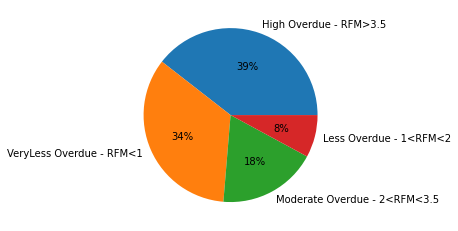

In [5]:
plt.pie(rfm_df.Customer_segment.value_counts(),
labels=rfm_df.Customer_segment.value_counts().index,
autopct='%.0f%%')
plt.show()